In [1]:
import pandas as pd

train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [2]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape


(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

In [10]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

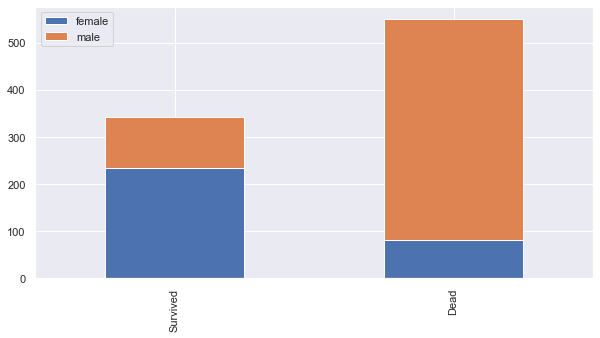

In [11]:
bar_chart('Sex')

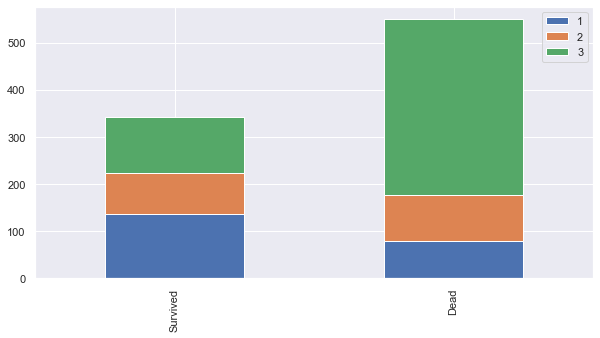

In [12]:
bar_chart('Pclass')

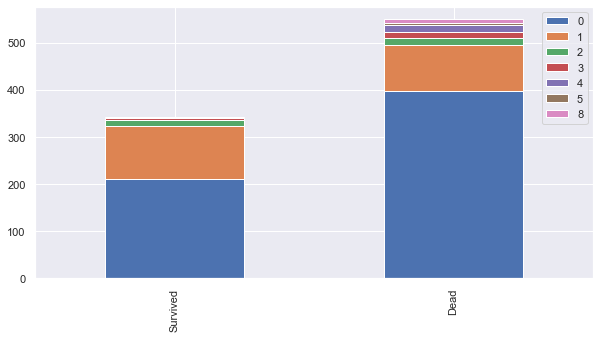

In [13]:
bar_chart('SibSp')

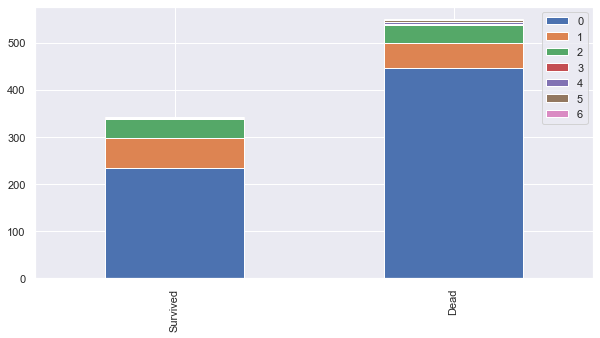

In [14]:
bar_chart('Parch')

In [15]:
train_test_data = [train, test] 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [16]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Mme           1
Jonkheer      1
Don           1
Ms            1
Capt          1
Countess      1
Sir           1
Name: Title, dtype: int64

In [17]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [18]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [20]:
test.shape

(418, 12)

In [21]:
train.shape

(891, 13)

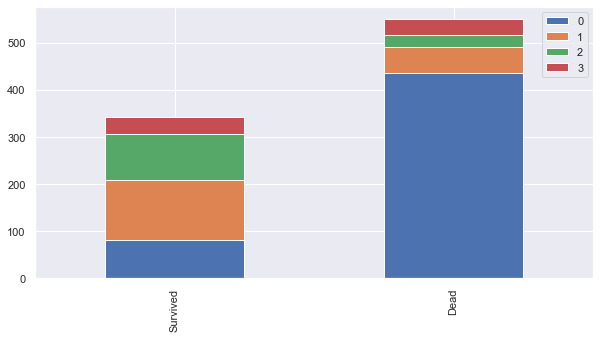

In [22]:
bar_chart('Title')

In [23]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
train['Title'].head()

0    0
1    2
2    1
3    2
4    0
Name: Title, dtype: int64

In [26]:
sex_mapping = {"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


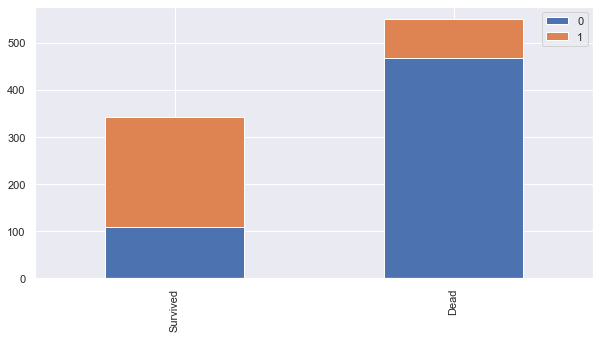

In [28]:
bar_chart('Sex')

In [29]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [30]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [31]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


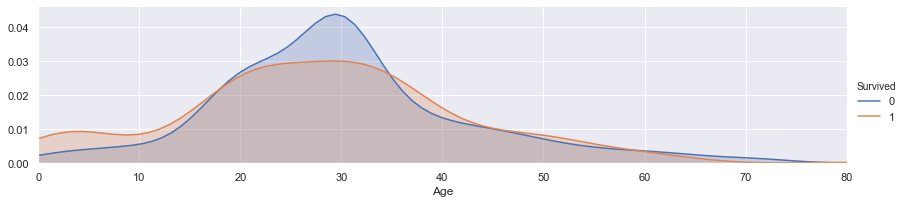

In [33]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

(70.0, 80.0)

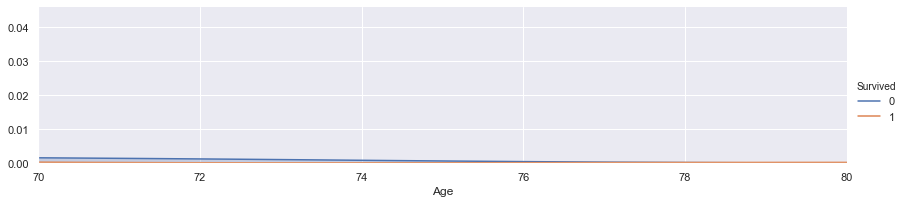

In [34]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(70, 80)

In [35]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [36]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


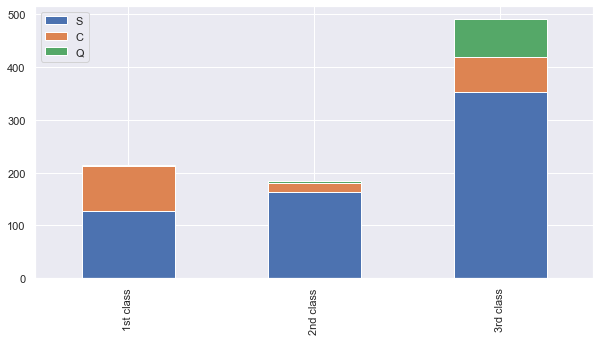

In [37]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [38]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    

In [39]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [41]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(5)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


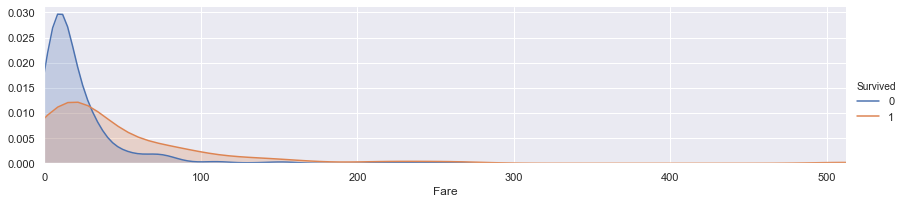

In [42]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

In [43]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [44]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,S,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,S,0


In [45]:
train["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
A32            1
A6             1
C32            1
C128           1
D49            1
Name: Cabin, Length: 147, dtype: int64

In [46]:
for dataset in train_test_data:
    dataset["Cabin"]=dataset["Cabin"].str[:1]

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,S,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,S,0


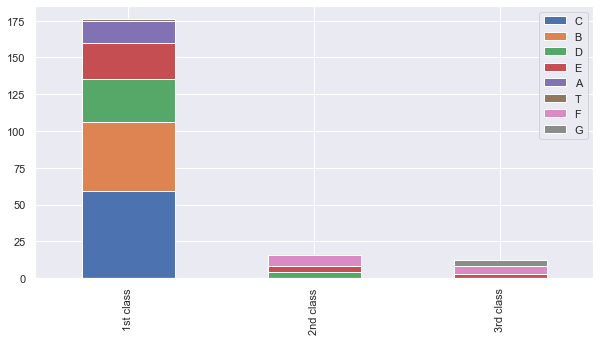

In [48]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [49]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,S,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,S,0


In [52]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [53]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,S,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,S,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,S,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,S,0


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [55]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

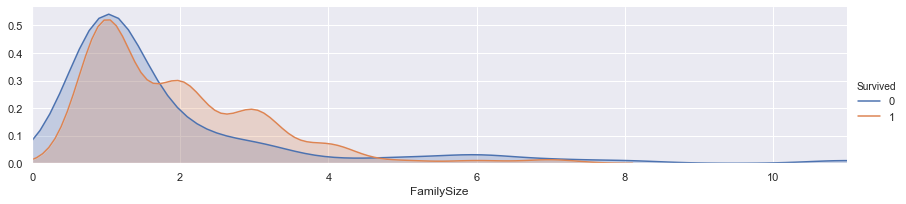

In [56]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [57]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [58]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop,axis=1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'],axis=1)


In [59]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape,target.shape


((891, 8), (891,))

In [60]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,S,0,0.4
1,1,1,3.0,2.0,0.8,C,2,0.4
2,3,1,1.0,0.0,2.0,S,1,0.0
3,1,1,2.0,2.0,0.8,S,2,0.4
4,3,0,2.0,0.0,2.0,S,0,0.0


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    object 
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 62.8+ KB


In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle =True,random_state=0)


In [64]:
train_test_data

[     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
 0              1         0       3    0  1.0      1      0         A/5 21171   
 1              2         1       1    1  3.0      1      0          PC 17599   
 2              3         1       3    1  1.0      0      0  STON/O2. 3101282   
 3              4         1       1    1  2.0      1      0            113803   
 4              5         0       3    0  2.0      0      0            373450   
 ..           ...       ...     ...  ...  ...    ...    ...               ...   
 886          887         0       2    0  2.0      0      0            211536   
 887          888         1       1    1  1.0      0      0            112053   
 888          889         0       3    1  1.0      1      2        W./C. 6607   
 889          890         1       1    0  1.0      0      0            111369   
 890          891         0       3    0  2.0      0      0            370376   
 
      Fare  Cabin Embarked

In [65]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [66]:
train_test_data

[     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
 0              1         0       3    0  1.0      1      0         A/5 21171   
 1              2         1       1    1  3.0      1      0          PC 17599   
 2              3         1       3    1  1.0      0      0  STON/O2. 3101282   
 3              4         1       1    1  2.0      1      0            113803   
 4              5         0       3    0  2.0      0      0            373450   
 ..           ...       ...     ...  ...  ...    ...    ...               ...   
 886          887         0       2    0  2.0      0      0            211536   
 887          888         1       1    1  1.0      0      0            112053   
 888          889         0       3    1  1.0      1      2        W./C. 6607   
 889          890         1       1    0  1.0      0      0            111369   
 890          891         0       3    0  2.0      0      0            370376   
 
      Fare  Cabin  Embarke

In [67]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,S,0,0.4
1,1,1,1,3.0,2.0,0.8,C,2,0.4
2,1,3,1,1.0,0.0,2.0,S,1,0.0
3,1,1,1,2.0,2.0,0.8,S,2,0.4
4,0,3,0,2.0,0.0,2.0,S,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,0.0,1.8,S,3,0.0
887,1,1,1,1.0,1.0,0.4,S,1,0.0
888,0,3,1,1.0,1.0,2.0,S,1,1.2
889,1,1,0,1.0,1.0,0.8,C,0,0.0


In [68]:
train = train_test_data[0]


In [69]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,1.8,0,3,0.0
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1,0.0
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,2.0,0,1,1.2
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0,0.0


In [70]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [71]:
test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,Q,0,0.0
1,893,3,1,3.0,0.0,2.0,S,2,0.4
2,894,2,0,3.0,0.0,2.0,Q,0,0.0
3,895,3,0,2.0,0.0,2.0,S,0,0.0
4,896,3,1,1.0,0.0,2.0,S,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0.0,2.0,S,0,0.0
414,1306,1,1,3.0,3.0,0.8,C,3,0.0
415,1307,3,0,3.0,0.0,2.0,S,0,0.0
416,1308,3,0,2.0,0.0,2.0,S,0,0.0


In [72]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,0.0,1.8,0,3,0.0
887,1,1,1,1.0,1.0,0.4,0,1,0.0
888,0,3,1,1.0,1.0,2.0,0,1,1.2
889,1,1,0,1.0,1.0,0.8,1,0,0.0


In [73]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [74]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [75]:
train_data.head()


,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [76]:
train_data.shape, target.shape

((891, 8), (891,))

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [78]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)


[0.76666667 0.80898876 0.7752809  0.7752809  0.87640449 0.76404494
 0.83146067 0.82022472 0.75280899 0.79775281]


In [79]:
round(np.mean(score)*100,2)


79.69

In [80]:
clf = RandomForestClassifier(n_estimators=13)
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)


[0.78888889 0.80898876 0.80898876 0.7752809  0.86516854 0.7752809
 0.80898876 0.80898876 0.76404494 0.83146067]


In [81]:
round(np.mean(score)*100,2)


80.36

In [82]:
test_data = train_test_data[1]

In [83]:
features_drop = ['PassengerId','Ticket', 'SibSp', 'Parch']
test_data = test_data.drop(features_drop, axis=1)

In [84]:
test_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,0.0
1,3,1,3.0,0.0,2.0,0,2,0.4
2,2,0,3.0,0.0,2.0,2,0,0.0
3,3,0,2.0,0.0,2.0,0,0,0.0
4,3,1,1.0,0.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...
413,3,0,2.0,0.0,2.0,0,0,0.0
414,1,1,3.0,3.0,0.8,1,3,0.0
415,3,0,3.0,0.0,2.0,0,0,0.0
416,3,0,2.0,0.0,2.0,0,0,0.0


In [85]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)
test_data = test_data.copy()
prediction = clf.predict(test_data)

In [86]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [87]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
